<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson10/dz10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  30 баллов
* Задача 2 &mdash;  60 баллов
* Задача 3 &mdash;  60 баллов






-----

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from tqdm import tqdm as tqdm
from scipy import integrate
import scipy.stats as sps
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm

sns.set(font_scale=1.3, palette='Set2')
%matplotlib inline

In [ ]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

### Задача 1

Проверьте, отличается ли распределение поперечного импульса `pT` $\pi^+$ (`id = 211`) и $\pi^-$ (`id = -211`) мюонов. Постройте гистограммы распределений и провидите относительный t-тест. [Ссылка на данные](https://drive.google.com/file/d/1qGNN9pcSg6safgxqvWeimQEPtlyggOYc/view?usp=share_link)

Сделайте выводы.

In [3]:
!gdown 1qGNN9pcSg6safgxqvWeimQEPtlyggOYc

Downloading...
From: https://drive.google.com/uc?id=1qGNN9pcSg6safgxqvWeimQEPtlyggOYc
To: /content/pi.csv
100% 1.21M/1.21M [00:00<00:00, 36.5MB/s]


In [4]:
df = pd.read_csv('pi.csv')
df.head()

,id,pT,xF,E
0,211,0.996910,1.861209,16.103207
1,211,0.837641,9.728960,84.014754
2,-211,0.540523,0.173407,1.598068
3,-211,0.746933,0.708969,6.168992
4,-211,0.272212,0.431071,3.734888


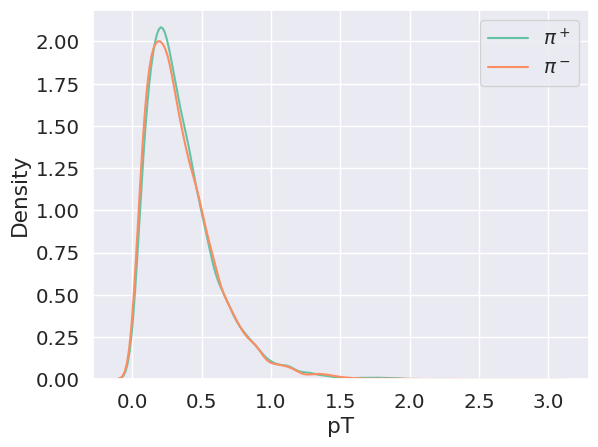

In [8]:
sns.kdeplot(df.loc[df.id == 211,'pT'],label='$\pi^+$')
sns.kdeplot(df.loc[df.id == -211,'pT'],label='$\pi^-$')
plt.legend()

Объясните выбор теста и сделайте выводы.

**Вывод:**

### Задача 2
#### **Профиль физика**


Как известно, частицы по величине спина можно разделить на две группы: бозоны и фермионы. Так как бозоны могут занимать одно и то же квантовое состояние, а фермионы не могут, то системы из нескольких таких частиц будет иметь различные распределения по энергиям. Однако, идеальный газ из таких частиц при высоких температурах будет иметь примерно одинаковое. распределение, а именно больцомонавское. В этой задаче вам требуется посмотреть, используя для этого t-test независимых выборок, как распределения энергий бозе- и ферми-газа отличаются статистически друг от друга при различных температурах.

In [9]:
P_f = lambda x, T: x ** 0.5 / (np.exp((x + T * np.log(T)) / T) + 1)
P_b = lambda x, T: x ** 0.5 / (np.exp((x + T * np.log(T)) / T) - 1)

In [10]:
T = 1.1

Z_f = integrate.quad(P_f, 0, 10 * T, args=(T))[0]
Z_b = integrate.quad(P_b, 0, 10 * T, args=(T))[0]

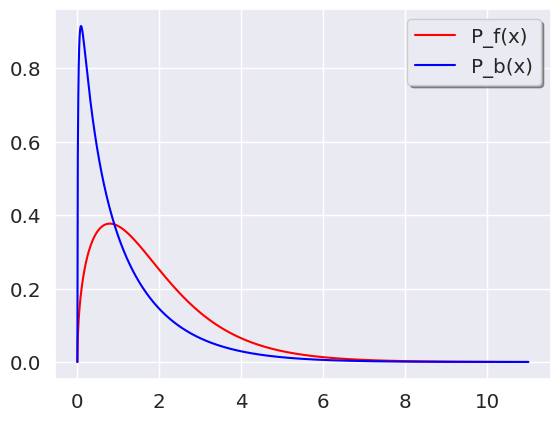

In [11]:
x_vals = np.linspace(0, 10 * T, 1000)
y_vals_f = P_f(x_vals, T)
y_vals_b = P_b(x_vals, T)
plt.figure(1)
plt.plot(x_vals, y_vals_f / Z_f, 'r', label='P_f(x)')
plt.plot(x_vals, y_vals_b / Z_b, 'b', label='P_b(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

Для начала научимся генериовать выборки из интересующих нас распределений. Чтобы получить такие выборки воспользуемся алгоритмом Метрополиса-Гастингса.

In [12]:
def sample_gas(T, P, steps=20000, sigma=3, cool_down=20):

    Q = lambda t1, t0: np.exp(-(t0)**2/(2 * (sigma * T)**2)/ \
        (np.sqrt(2 * np.pi) * (sigma * T)))

    Z = integrate.quad(P, 0, 100 * T, args=(T))[0]

    x0 = np.random.uniform(0, 2 * T)
    xt = x0

    samples = []

    for i in range(steps):
        xt_candidate = np.abs(np.random.normal(loc=xt, scale=sigma * T))

        accept_prob = (P(xt_candidate, T) * Q(xt, xt_candidate))/ \
            (P(xt, T) * Q(xt_candidate, xt))

        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate

        if i % cool_down == 0:
            samples.append(xt)

    burn_in = 1000 // cool_down

    samples = np.array(samples[burn_in:])

    return samples, Z

In [13]:
samples_f, Z_f = sample_gas(T, P_f)
samples_b, Z_b = sample_gas(T, P_b)

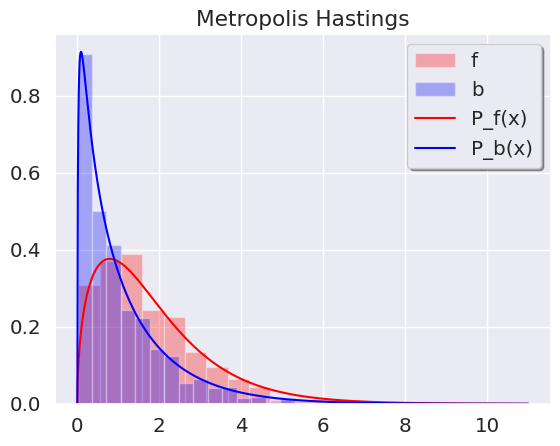

In [14]:
plt.hist(samples_f, bins=20, histtype='bar', facecolor='r', alpha=0.3, density=True, label='f')
plt.hist(samples_b, bins=20, histtype='bar', facecolor='b', alpha=0.3, density=True, label='b')
plt.plot(x_vals, y_vals_f/Z_f, 'r', label='P_f(x)')
plt.plot(x_vals, y_vals_b/Z_b, 'b', label='P_b(x)')
plt.title('Metropolis Hastings')
plt.legend(loc='upper right', shadow=True)
plt.show()


**1.**
Зафиксируйте значение "температуры" `T` и несколько АА-тестов для выборок ферми-газа, чтобы убедиться в корректности работы нашего теста. Для этого 2000 раз сгенерируйте две выборки для ферми-газа и посчитайте p-value t-теста независимых выборок.

In [ ]:
# ваш код

Постройте гистограмму значений p-value. Корректно ли работает t-тест на ваших данных?

In [ ]:
# ваш код

**Вывод:**

**2.** С помощью проведения AB-тестов узнайте, какова мощность теста для разных значений "температуры" (постройте график). Для наглядности используйте логарифмическое разбиение шкалы "температуры" `np.logspace` и стройте график в логарифмическом масштабе

In [ ]:
Ts = np.logspace(0.001, 1, 20)

In [ ]:
# ваш код

**Вывод:**

#### **Профиль биология**


Рассмотрим [данные по медицинским страховкам](https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv):

Скачайте файл с тренировочными данными и оставьте колонку:
* `charges` &mdash; стоимость страховки человека.

In [15]:
!pip install opendatasets -q

In [16]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 92.3k/92.3k [00:00<00:00, 84.9MB/s]

In [18]:
# ваш код
charges = pd.read_csv('medical-insurance-cost/Train_Data.csv')['charges']

Министерство здравоохранения хочет провести AB-тест для оценки значимости эффекта от новых рекомендаций по употреблению витаминов и использовать для этого t-test независимых выборок. Ожидается, что новые рекомендации повысят здоровье общества и снизят траты на страховку. На время тестирования решено выдать рекомендации случайной группе из 1000 людей.

**1.**
Проведите 2000 случайных AA-тестов для проверки правильности работы t-теста. Использовать нужно группы одинакого размера, конечно же, они не должны пересекаться.

In [ ]:
# ваш код

Постройте гистограмму значений p-value. Корректно ли работает t-тест на ваших данных?

In [ ]:
# ваш код

**Вывод:**

**2.** Зафиксируйте две выборки одинакового размера: контрольную и тестовую. С помощью проведения AB-теста выясните, какова мощность теста для разных значений эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить отрицательное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого человека. Поясните, для этого это может быть полезно. Сделайте выводы.

In [ ]:
# ваш код

**Вывод:**

### Задача 3
#### **Профиль физика**


Рассмотрим [данные о RGB (Red Giant Branch) и
HeB (Helium Burning) звездах](https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv):

Датасет содержит информацию о звездах, целевая переменная — класс звезд.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (звездами RGB и HeB). При возможности оцените также степень различия, в т.ч. доверительный интервал.

Скачайте файл и визуализируйте колонки (например, pairplot):
* `Dnu` &mdash; разделение мод с одинаковой степенью и последовательным порядком;
* `numax` &mdash; частота максимальной мощности колебаний;
* `epsilon` &mdash; расположение режима l=0 ;
* `Pop` &mdash; Population (0 = RGB, 1 = HeB)

In [28]:
!wget https://wiki.yandex.ru/users/ergardt.av/phds/e82e4fbe-bfc3-46ac-9e80-be75b7fcf8b2/.files/ab-testirovanie.pdf

--2023-12-01 22:11:06--  https://wiki.yandex.ru/users/ergardt.av/phds/e82e4fbe-bfc3-46ac-9e80-be75b7fcf8b2/.files/ab-testirovanie.pdf
Resolving wiki.yandex.ru (wiki.yandex.ru)... 87.250.251.164, 2a02:6b8::2dd
Connecting to wiki.yandex.ru (wiki.yandex.ru)|87.250.251.164|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized

Username/Password Authentication Failed.


In [20]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


KeyError: ignored

In [ ]:
data = <...>

In [ ]:
<...> # визуализация

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия, сдвиг?

**Вывод:**

Оцените, по каким признакам различаются классы, степень различия (сдвиг) и доверительный интервал сдвига. В качестве доверительного интервала используйте бутстрепный перцентильный. Объясните выбор статистического теста.

Подсказка: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://https://habr.com/ru/companies/avito/articles/709596/).

In [ ]:
def shift(x, y):
    W = <...>
    return np.median(W)

def estimation(data, target, feature, p_values, shifts, ci_lefts, ci_rights, alpha=0.05):
    x = <...>
    y = <...>

    p_values.append(<...>)

    shifts.append(shift(x, y))

    res = <...> # бутстрепный доверительный интервал
    ci_lefts.append(res[0])
    ci_rights.append(res[1])


In [ ]:
p_values, shifts, ci_lefts, ci_rights = [], [], [], []
for column in tqdm(data.columns[1:]):
    estimation(<...>)

In [ ]:
results = {'feature': data.columns[1:],
           'p_value': p_values,
           'shift': shifts,
           'ci_left': ci_lefts,
           'ci_right': ci_rights}
results = pd.DataFrame(results)

In [ ]:
results

*Замечание.* Строго говоря, необходима поправка на множественное тестирование

Какой тест вы использовали и почему? Какие выводы можно сделать по p_value? Как доверительный интервал подтверждает эти выводы? Дополнительно: обратите внимание на `epsilon`: корректно ли оценивать сдвиг между распределениями по этой величине?

**Вывод:**

#### **Профиль биология**


Рассмотрим [данные о расстройствах сна](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv):

Датасет содержит информацию о образе жизни людей, целевая переменная — есть ли у них расстройство сна.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (теми, у кого есть расстройство сна и теми, у кого нет). При возможности оцените также степень различия, в т.ч. доверительный интервал.

Скачайте файл и оставьте колонки:
* `Age` &mdash; возраст;
* `Sleep Duration` &mdash; длительность сна;
* `Physical Activity Level` &mdash; уровень физической активности;
* `Heart Rate` &mdash; ЧСС;
* `Daily Steps` &mdash; число пройденных шагов в день;
* `Sleep Disorder` &mdash; целевая переменная;

In [21]:
od.download('https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 2.54k/2.54k [00:00<00:00, 2.22MB/s]

In [22]:
data = pd.read_csv('sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [23]:
columns = ['Age', 'Sleep Duration', 'Physical Activity Level',
           'Heart Rate', 'Daily Steps', 'Sleep Disorder']

In [24]:
data = data[columns]
data

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,None
1,28,6.2,60,75,10000,None
2,28,6.2,60,75,10000,None
3,28,5.9,30,85,3000,Sleep Apnea
4,28,5.9,30,85,3000,Sleep Apnea
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Sleep Apnea
370,59,8.0,75,68,7000,Sleep Apnea
371,59,8.1,75,68,7000,Sleep Apnea
372,59,8.1,75,68,7000,Sleep Apnea


Для упрощения задачи не будем рассматривать вид расстройства сна &mdash; только есть оно или нет.

In [25]:
dis = data.loc[:, 'Sleep Disorder'].copy()
dis[dis != 'None'] = 'Disorder'
data['Sleep Disorder'] = dis
data

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,None
1,28,6.2,60,75,10000,None
2,28,6.2,60,75,10000,None
3,28,5.9,30,85,3000,Disorder
4,28,5.9,30,85,3000,Disorder
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Disorder
370,59,8.0,75,68,7000,Disorder
371,59,8.1,75,68,7000,Disorder
372,59,8.1,75,68,7000,Disorder


Визуализируйте распределение признаков при разных значениях целевой переменной (например, pairplot)

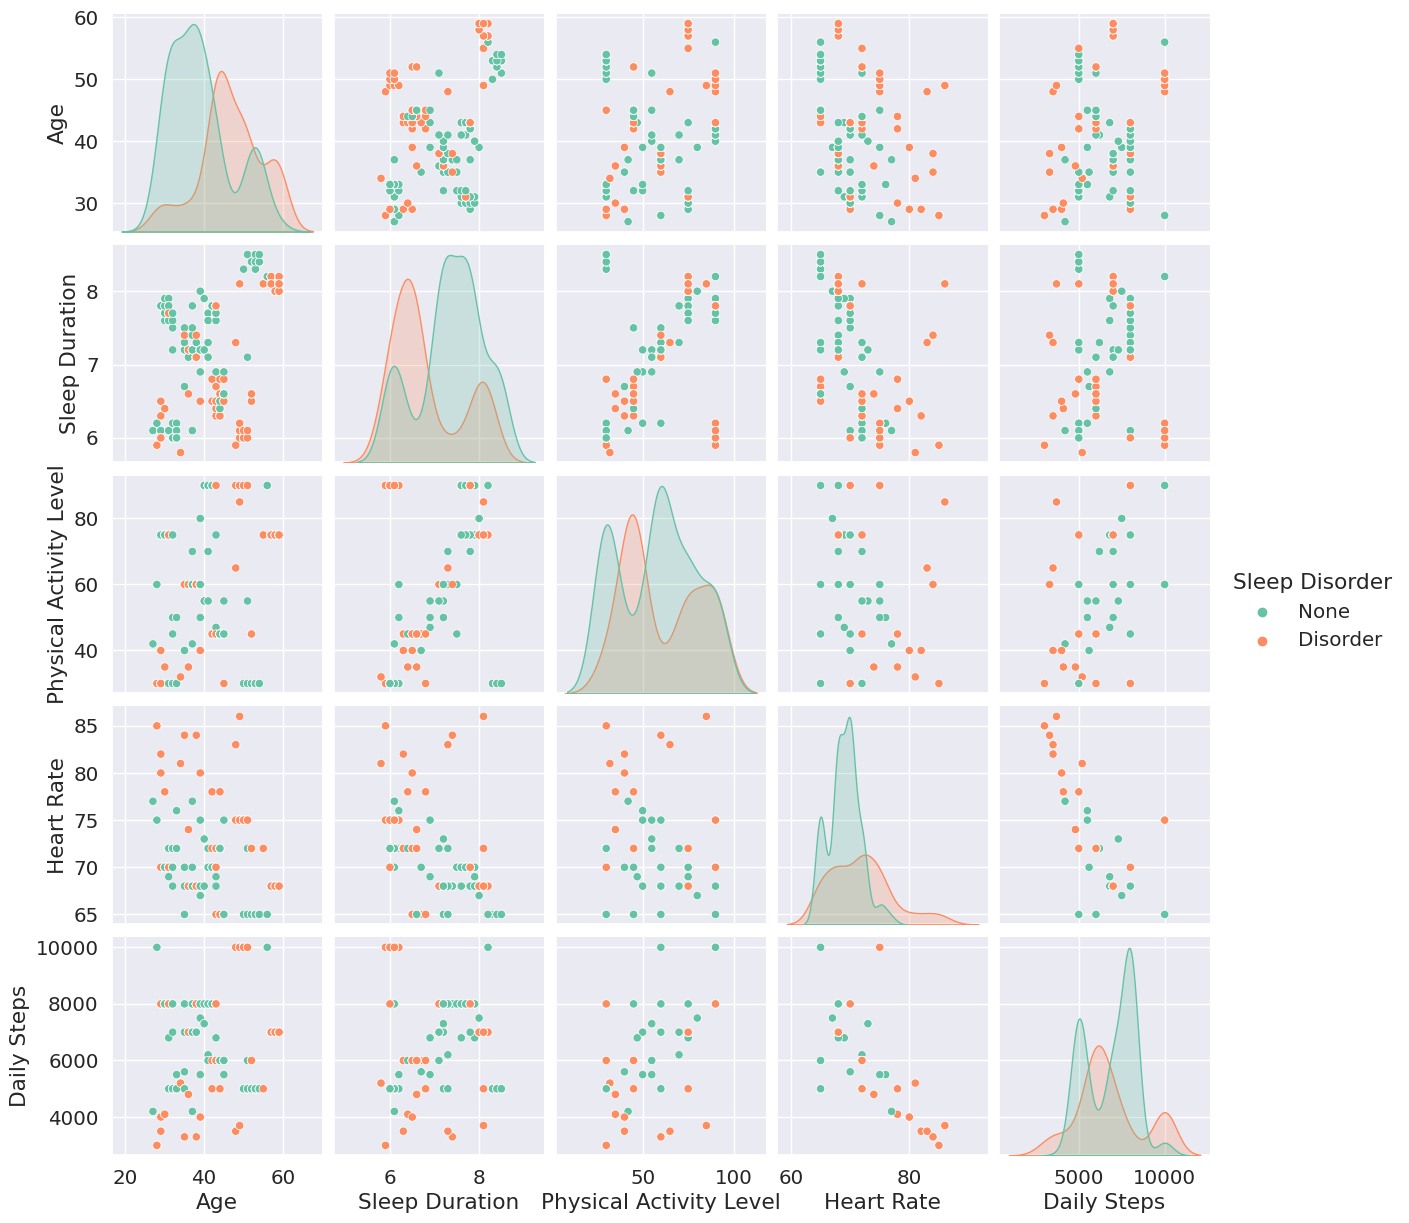

In [27]:
sns.pairplot(data,hue='Sleep Disorder') # визуализация

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия, сдвиг?

**Вывод:**

Оцените, по каким признакам различаются классы, степень различия (сдвиг) и доверительный интервал сдвига. В качестве доверительного интервала используйте бутстрепный перцентильный. Объясните выбор статистического теста.

Подсказка: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://https://habr.com/ru/companies/avito/articles/709596/).

In [ ]:
def shift(x, y):
    W = <...>
    return np.median(W)

def estimation(data, target, feature, p_values, shifts, ci_lefts, ci_rights, alpha=0.05):
    x = <...>
    y = <...>

    p_values.append(<...>)

    shifts.append(shift(x, y))

    res = <...> # бутстрепный доверительный интервал
    ci_lefts.append(res[0])
    ci_rights.append(res[1])


In [ ]:
p_values, shifts, ci_lefts, ci_rights = [], [], [], []
for column in tqdm(columns[:-1]):
    estimation(<...>)

In [ ]:
results = {'feature': columns[:-1],
           'p_value': p_values,
           'shift': shifts,
           'ci_left': ci_lefts,
           'ci_right': ci_rights}
results = pd.DataFrame(results)

In [ ]:
results

*Замечание.* Строго говоря, необходима поправка на множественное тестирование

Какой тест вы использовали и почему? Какие выводы можно сделать по p-value? Как доверительный интервал соотносится с этими выводами?

**Вывод:**